In [1]:
import pandas as pd
from collections import Counter
import itertools
# Load the csv file
dataframe = pd.read_csv("C:/Users/test/Downloads/fraud_data.csv")
dataframe.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


In [2]:
dataframe.isnull().values.any()

False

In [3]:
dataframe["Amount"].describe()

count    21693.000000
mean        86.776247
std        235.644479
min          0.000000
25%          5.370000
50%         21.950000
75%         76.480000
max       7712.430000
Name: Amount, dtype: float64

In [4]:
non_fraud = len(dataframe[dataframe.Class == 0])
fraud = len(dataframe[dataframe.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100
print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  21337
Number of Fraud transactions:  356
Percentage of Fraud transactions: 1.6411


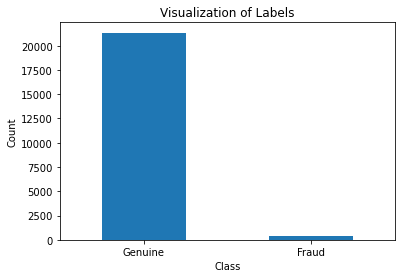

In [5]:
import matplotlib.pyplot as plt
labels = ["Genuine", "Fraud"]
count_classes = dataframe.value_counts(dataframe['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataframe["NormalizedAmount"] = scaler.fit_transform(dataframe["Amount"].values.reshape(-1, 1))
dataframe.drop(["Amount"], inplace= True, axis= 1)

Y = dataframe["Class"]
X = dataframe.drop(["Class"], axis= 1)

In [7]:
from sklearn.model_selection import train_test_split

(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (15185, 29)
Shape of test_X:  (6508, 29)


In [8]:
#Dropping Time as it's non business required data
estimators=[ 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

X = dataframe[estimators]
Y = dataframe['Class']

In [9]:
col=X.columns[:-1]
col

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27'],
      dtype='object')

In [10]:
import statsmodels.api as sm

In [11]:
X1 = sm.add_constant(X)
reg_logit = sm.Logit(Y,X1)
results_logit = reg_logit.fit()

Optimization terminated successfully.
         Current function value: 0.017693
         Iterations 11


In [12]:
results_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                21693
Model:                          Logit   Df Residuals:                    21664
Method:                           MLE   Df Model:                           28
Date:                Mon, 10 Apr 2023   Pseudo R-squ.:                  0.7887
Time:                        09:33:51   Log-Likelihood:                -383.81
converged:                       True   LL-Null:                       -1816.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.8729      0.216    -31.813      0.000      -7.296      -6.449
V1             0.0849      0.060      1.421      0.155      -0.032       0.202
V2            -0.0368      0.067     -0.547      0.584      -0.169       0.095
V3            -0.0059      0.071     -0.083      0.934      -0.145       0.133
V4             0.7388      0.097      7.624      0.000       0.549       0.929
V5             0.0447      0.094      0.475      0.635      -0.140       0.229
V6            -0.2189      0.134     -1.639      0.101      -0.481       0.043
V7            -0.0430      0.086     -0.501      0.617      -0.211       0.125
V8            -0.3116      0.054     -5.791      0.000      -0.417      -0.206
V9            -0.2162      0.148     -1.464      0.143      -0.506       0.073
V10           -0.4411      0.145     -3.040      0.002      -0.725      -0.157
V11            0.3104      0.108      2.861      0.004       0.098       0.523
V12           -0.4134      0.116     -3.569      0.000      -0.640      -0.186
V13           -0.2703      0.117     -2.313      0.021      -0.499      -0.041
V14           -0.6817      0.094     -7.275      0.000      -0.865      -0.498
V15           -0.1947      0.129     -1.515      0.130      -0.447       0.057
V16           -0.3024      0.169     -1.785      0.074      -0.634       0.030
V17            0.0450      0.100      0.449      0.654      -0.151       0.241
V18           -0.1209      0.177     -0.684      0.494      -0.467       0.226
V19           -0.0796      0.140     -0.567      0.570      -0.355       0.195
V20           -0.1446      0.138     -1.044      0.296      -0.416       0.127
V21            0.3163      0.094      3.369      0.001       0.132       0.500
V22            0.4881      0.188      2.598      0.009       0.120       0.856
V23           -0.1311      0.109     -1.202      0.229      -0.345       0.083
V24            0.1085      0.242      0.448      0.654      -0.366       0.583
V25            0.0161      0.216      0.075      0.941      -0.407       0.439
V26           -0.4271      0.298     -1.433      0.152      -1.011       0.157
V27           -0.2557      0.264     -0.968      0.333      -0.774       0.262
V28            0.0216      0.252      0.086      0.932      -0.472       0.515
==============================================================================
"""

In [13]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(train_X,train_Y)


LogisticRegression()

In [14]:
pred = logreg.predict(test_X)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

In [16]:
cm1 = confusion_matrix(test_Y, pred)
cm1

array([[6406,    3],
       [  16,   83]], dtype=int64)

In [17]:
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [18]:
print("Evaluation of Logistic Regression")
print()
metrics(test_Y, pred.round())

Evaluation of Logistic Regression

Accuracy: 0.99708
Precision: 0.96512
Recall: 0.83838
F1-score: 0.89730


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
#Decision Tree
decision_tree = DecisionTreeClassifier()
# Random Forest
random_forest = RandomForestClassifier(n_estimators= 100)

In [20]:
decision_tree.fit(train_X, train_Y)
predictions_dt = decision_tree.predict(test_X)
decision_tree_score = decision_tree.score(test_X, test_Y) * 100

random_forest.fit(train_X, train_Y)
predictions_rf = random_forest.predict(test_X)
random_forest_score = random_forest.score(test_X, test_Y) * 100

print("Random Forest Score: ", random_forest_score)
print("Decision Tree Score: ", decision_tree_score)

Random Forest Score:  99.7541487400123
Decision Tree Score:  99.0780577750461


In [21]:
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score


def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [22]:
confusion_matrix_dt = confusion_matrix(test_Y, predictions_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt)


Confusion Matrix - Decision Tree
[[6370   39]
 [  21   78]]


In [23]:
print("Evaluation of Decision Tree Model")
print()
metrics(test_Y, predictions_dt.round())

Evaluation of Decision Tree Model

Accuracy: 0.99078
Precision: 0.66667
Recall: 0.78788
F1-score: 0.72222


In [24]:
confusion_matrix_rf = confusion_matrix(test_Y, predictions_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)


Confusion Matrix - Random Forest
[[6407    2]
 [  14   85]]


In [25]:
print("Evaluation of Random Forest Model")
print()
metrics(test_Y, predictions_rf.round())

Evaluation of Random Forest Model

Accuracy: 0.99754
Precision: 0.97701
Recall: 0.85859
F1-score: 0.91398


In [26]:
from sklearn import svm


import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.svm import SVR

classifier =svm.SVC(kernel='linear')
classifier.fit(train_X, train_Y)

SVC(kernel='linear')

In [27]:
prediction_SVM_all = classifier.predict(test_X)

In [28]:
cm = confusion_matrix(test_Y, prediction_SVM_all)
cm

array([[6407,    2],
       [  17,   82]], dtype=int64)

In [29]:
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [30]:
print("Evaluation of Support Vector Machine")
print()
metrics(test_Y, prediction_SVM_all.round())

Evaluation of Support Vector Machine

Accuracy: 0.99708
Precision: 0.97619
Recall: 0.82828
F1-score: 0.89617


In [31]:
X_array=X.values
Y_array=Y.values

In [32]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2,random_state=0,algorithm="elkan",max_iter=10000,n_jobs=-1)
kmeans.fit(train_X,train_Y)


C:\Users\test\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(algorithm='elkan', max_iter=10000, n_clusters=2, n_jobs=-1,
       random_state=0)

In [33]:
kmeans_predicted_train_labels=kmeans.predict(test_X)

In [34]:
#confusion matrix
# tn fp
# fn tp
print("tn --> true negatives")
print("fp --> false positives")
print("fn --> false negatives")
print("tp --> true positives")


tn --> true negatives
fp --> false positives
fn --> false negatives
tp --> true positives


In [35]:
cm4= confusion_matrix(test_Y,kmeans_predicted_train_labels)
cm4

array([[6409,    0],
       [  54,   45]], dtype=int64)

In [36]:
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

In [37]:
print("Evaluation of Kmeans Clustering")
print()
metrics(test_Y, kmeans_predicted_train_labels.round())

Evaluation of Kmeans Clustering

Accuracy: 0.99170
Precision: 1.00000
Recall: 0.45455
F1-score: 0.62500


In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score as roc

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [40]:
classifier = GaussianNB()
scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.fit_transform(test_X)

In [41]:
classifier.fit(train_X, train_Y)

GaussianNB()

In [42]:
#predict the model on the train values and check results
predTrain = classifier.predict(train_X)
print(classification_report(train_Y, predTrain))
print('ROC AUC Score: ',roc(train_Y, predTrain))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     14928
           1       0.38      0.83      0.52       257

    accuracy                           0.97     15185
   macro avg       0.69      0.90      0.75     15185
weighted avg       0.99      0.97      0.98     15185

ROC AUC Score:  0.9025734680812909


In [43]:
#predict test values and check results
predTest = classifier.predict(test_X)
print(classification_report(test_Y, predTest))
print('ROC AUC Score: ',roc(test_Y, predTest))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      6409
           1       0.38      0.87      0.53        99

    accuracy                           0.98      6508
   macro avg       0.69      0.92      0.76      6508
weighted avg       0.99      0.98      0.98      6508

ROC AUC Score:  0.9234212936038494


In [45]:
from sklearn.neighbors import KNeighborsClassifier
(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

In [47]:
from sklearn.preprocessing import normalize
train_X = normalize(train_X)
test_X=normalize(test_X)

In [49]:
neighbours = np.arange(1,25)
train_accuracy =np.empty(len(neighbours))
test_accuracy = np.empty(len(neighbours))

for i,k in enumerate(neighbours):
    #Setup a knn classifier with k neighbors
    knn=KNeighborsClassifier(n_neighbors=k,algorithm="kd_tree",n_jobs=-1)
    
    #Fit the model
    knn.fit(train_X,train_Y.ravel())
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(train_X, train_Y.ravel())
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(test_X, test_Y.ravel()) 

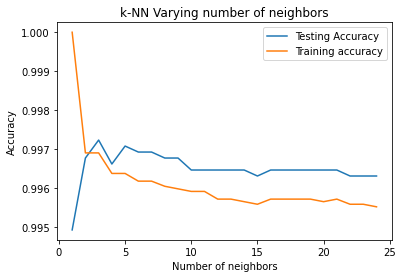

In [50]:
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbours, test_accuracy, label='Testing Accuracy')
plt.plot(neighbours, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [51]:
idx = np.where(test_accuracy == max(test_accuracy))
x = neighbours[idx]

In [52]:
knn=KNeighborsClassifier(n_neighbors=x[0],algorithm="kd_tree",n_jobs=-1)
knn.fit(train_X,train_Y.ravel())

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1, n_neighbors=3)

In [55]:
knn_predicted_test_labels=knn.predict(test_X)

In [56]:
knn_accuracy_score  = accuracy_score(test_Y,knn_predicted_test_labels)
knn_precison_score  = precision_score(test_Y,knn_predicted_test_labels)
knn_recall_score    = recall_score(test_Y,knn_predicted_test_labels)
knn_f1_score        = f1_score(test_Y,knn_predicted_test_labels)

In [57]:
print("")
print("K-Nearest Neighbours")
print("Scores")
print("Accuracy -->",knn_accuracy_score)
print("Precison -->",knn_precison_score)
print("Recall -->",knn_recall_score)
print("F1 -->",knn_f1_score)
print(classification_report(test_Y,knn_predicted_test_labels))



K-Nearest Neighbours
Scores
Accuracy --> 0.9972341733251383
Precison --> 0.9550561797752809
Recall --> 0.8585858585858586
F1 --> 0.9042553191489363
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6409
           1       0.96      0.86      0.90        99

    accuracy                           1.00      6508
   macro avg       0.98      0.93      0.95      6508
weighted avg       1.00      1.00      1.00      6508



In [62]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
# Applying Ada Boost Classifier 
ada_boost = AdaBoostClassifier(n_estimators = 100, random_state = 123)


In [67]:

ada_boost.fit(train_X,train_Y)



AdaBoostClassifier(n_estimators=100, random_state=123)

In [68]:
y_predictions_ab = ada_boost.predict(test_X)

In [70]:
# Printing Evaluation Metrics for Ada Boost
metrics_ab = [['Accuracy',(accuracy_score(test_Y, y_predictions_ab))],
                         ['Precision',precision_score(test_Y, y_predictions_ab)],
                         ['Recall', recall_score(test_Y, y_predictions_ab)],
                         ['F1_score',f1_score(test_Y, y_predictions_ab)]]
metrics_df_ab = pd.DataFrame(metrics_ab, columns = ['Metrics', 'Results'])
metrics_df_ab

,Metrics,Results
0,Accuracy,0.995698
1,Precision,0.890110
2,Recall,0.818182
3,F1_score,0.852632


In [71]:

gradient_boosting = GradientBoostingClassifier(n_estimators = 100, random_state = 123)
gradient_boosting.fit(train_X,train_Y)



GradientBoostingClassifier(random_state=123)

In [72]:
y_prediction_gb = gradient_boosting.predict(test_X)

In [74]:
metrics_gb = [['Accuracy',(accuracy_score(test_Y, y_prediction_gb))],
                         ['Precision',precision_score(test_Y, y_prediction_gb)],
                         ['Recall', recall_score(test_Y, y_prediction_gb)],
                         ['F1_score',f1_score(test_Y, y_prediction_gb)]]
metrics_df_gb = pd.DataFrame(metrics_gb, columns = ['Metrics', 'Results'])
metrics_df_gb

,Metrics,Results
0,Accuracy,0.995083
1,Precision,0.876404
2,Recall,0.787879
3,F1_score,0.829787


In [77]:
from sklearn.metrics import roc_auc_score
print('Ada Boost ROC AUC Score: ', (roc_auc_score(test_Y, y_predictions_ab) * 100).round(2))
print('Gradient Boost ROC AUC Score: ', (roc_auc_score(test_Y, y_prediction_gb) * 100).round(2))

Ada Boost ROC AUC Score:  90.83
Gradient Boost ROC AUC Score:  89.31
